In [1]:
# Ensure we are using the latest version to avoid problems
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.2 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.1

In [43]:
from fastai.vision.all import *
path = Path("/kaggle/input/bsas-city-landmarks-3")

In [45]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(250, min_scale=0.5),
    batch_tfms=aug_transforms()
).dataloaders(path, bs=32)

In [46]:
import timm
learn = vision_learner(dls, "resnet50", metrics=error_rate)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.001737800776027143

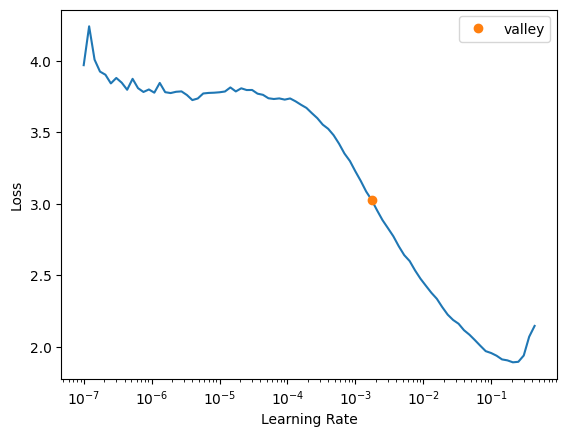

In [47]:
lr_suggested = learn.lr_find()
lr_valley = lr_suggested.valley
lr_valley

In [48]:
learn.fine_tune(10, lr_valley)

epoch,train_loss,valid_loss,error_rate,time
0,1.504683,0.233281,0.064615,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.413044,1.919574,0.067692,00:21
1,0.349684,0.276611,0.040000,00:21
2,0.284521,0.357978,0.046154,00:20
3,0.244505,0.237734,0.036923,00:21
4,0.194794,0.299551,0.040000,00:21
5,0.159174,0.397969,0.036923,00:21
6,0.150719,0.294118,0.033846,00:21
7,0.126748,0.184368,0.036923,00:21
8,0.107850,0.995868,0.036923,00:21
9,0.110106,3.183073,0.043077,00:21


In [50]:
learn.export("model.pkl")

In [51]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

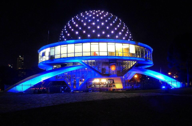

In [53]:
img_data = uploader.value[0]['content'].tobytes()
img = PILImage.create(img_data)
img.to_thumb(192)
# https://commons.wikimedia.org/wiki/File:Planetario_de_Buenos_Aires_4_-_panoramio.jpg
# Aleksandrs Timofejev…, CC BY 3.0 <https://creativecommons.org/licenses/by/3.0>, via Wikimedia Commons

In [55]:
# Predict
predicted_class, predicted_idx, probs = learn.predict(img)

# Print the predicted class
print(f"Predicted Class: {predicted_class}")

# Print the predicted class index
print(f"Predicted Class Index: {predicted_idx}")

# Print the probabilities for each category
# First, get the order from the vocab object (inside the dataloaders)
categories = learn.dls.vocab
categories
print("Class Probabilities:")
for i, prob in enumerate(probs):
    print(f"{categories[i]}: {prob:.4f} ({prob.item() * 100:.2f}%)")

Predicted Class: Planetario_Galileo_Galilei_Palermo_Buenos_Aires
Predicted Class Index: 8
Class Probabilities:
Casa_Rosada_Argentina: 0.0000 (0.00%)
Catedral_Metropolitana_Buenos_Aires: 0.0000 (0.00%)
Cementerio_Recoleta_Buenos_Aires: 0.0000 (0.00%)
Floralis_Genérica_Buenos_Aires: 0.0000 (0.00%)
Jardín_Botánico_Palermo_Buenos_Aires: 0.0000 (0.00%)
MALBA_museo_Buenos_Aires: 0.0000 (0.00%)
Obelisco_Buenos_Aires: 0.0000 (0.00%)
Palacio_Barolo_Buenos_Aires: 0.0000 (0.00%)
Planetario_Galileo_Galilei_Palermo_Buenos_Aires: 1.0000 (100.00%)
Teatro_Colón_Argentina: 0.0000 (0.00%)
Torre_Monumental_Retiro_Buenos_Aires: 0.0000 (0.00%)
